In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import xarray as xr
import os
import math as m

In [41]:
# directory = "C:/Users/user/Desktop/my_folder/t6_extra_output/"
directory = "C:/Users/user/Desktop/my_folder/t6_extra_output/"

file_list = np.array ([file for file in os.listdir(directory) if file.endswith('.nc')])
# file_list

In [67]:
# Aggregating files by dictionaries: 
# timcor (2d spatial data), fldcor (array of values by timesteps), timmean (single value)
file_dict = {}
timcor = {}
fldcor = {}
timmean = {}
for file in file_list:
    dataset = xr.open_dataset(os.path.join(directory, file), decode_times=False)
    file_dict[file] = dataset
    if 'ERA5' in file:
         continue
    if 'timcor' in file:
        timcor[file] = dataset
    if 'fldcor' in file:
        fldcor[file] = dataset
    if 'timmean' in file:
        timmean[file] = dataset
# timmean['timmean_fldcor_tas_Amon_ACCESS_CM2_ssp585_r1i1p1f1_185001_210012.nc']
# len(timmean)

6

In [82]:
file = 'timcor_tas_Amon_ACCESS_CM2_ssp585_r1i1p1f1_185001_210012_r360x180.nc'

<xarray.DataArray 'tas' (lat: 13, lon: 31)> Size: 3kB
[403 values with dtype=float64]
Coordinates:
    time     float64 8B 1.942e+03
  * lon      (lon) float64 248B 30.0 31.0 32.0 33.0 34.0 ... 57.0 58.0 59.0 60.0
  * lat      (lat) float64 104B 47.5 48.5 49.5 50.5 51.5 ... 56.5 57.5 58.5 59.5
Attributes:
    standard_name:  air_temperature
    long_name:      2m temperature
    units:          K
    cell_methods:   time: mean

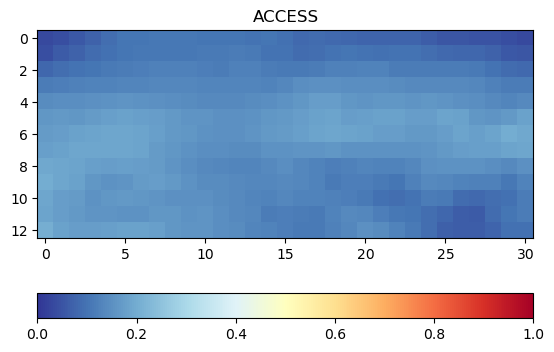

In [84]:
plt.title(file.split('_')[3], fontsize=12)
plt.imshow(file_dict[file]['tas'][0][::-1],  vmin=0, vmax=1, cmap='RdYlBu_r')

plt.colorbar(orientation='horizontal')
# plt.savefig("01.png")

In [107]:
def data_disp (keyword, stopword, data_dict, name_value, columns, n_lat, n_lon, pos_in_filename, title,
               scale_range, fig_name):

    #### Displayig 25 timcors (data_dict) -- this will work only for 2d arrays with 1 timestep
    if keyword == '' and stopword == '':
        data_list = np.array([file for file in data_dict.keys()])
    elif stopword == '':
        data_list = np.array([file for file in data_dict.keys() if keyword in file])
    else:
        data_list = np.array([file for file in data_dict.keys() if (keyword in file and not stopword in file)])
    
    data_list = np.sort(data_list)
    n_subs = len(data_list)
    fig, ax = plt.subplots(n_subs//columns, columns, figsize=(11.7, 8.3), layout='constrained')
      
    fig.suptitle (title, fontsize=14)

    for i in range(n_subs):
        row = i // columns
        column = i % columns

        name = data_list[i].split('_')[pos_in_filename]
        array = data_dict[data_list[i]][name_value][0]
        
        if scale_range == 0:
            plotted = ax[row, column].imshow(array[::-1], cmap='RdYlBu_r')
        if scale_range == 1:
            plotted = ax[row, column].imshow(array[::-1],  vmin=0, vmax=1, cmap='RdYlBu_r')
        else:
            plotted = ax[row, column].imshow(array[::-1],  vmin=-scale_range, vmax=scale_range, cmap='RdYlBu_r')
            
        ax[row, column].set_title(name, fontsize=10)

        if n_lat*n_lon != 0:
            # Counting how to place ticks
            longitudes = np.array (array['lon'], dtype='int')
            latitudes = np.array (array['lat'][0:180]+0.5, dtype='int')
            lon_step = len(longitudes)//(n_lon-1)
            lat_step = m.ceil(len(latitudes)/(n_lat))

            ax[row, column].tick_params(length=2, labelsize=6)
            ax[row, column].set_xticks(np.arange(0, len(longitudes), lon_step))
            ax[row, column].set_xticklabels(list(str(lon) + 'E' for lon in longitudes[::lon_step]))
            ax[row, column].set_yticks(np.arange(0, len(latitudes), lat_step))
            ax[row, column].set_yticklabels(list(str(lat) + 'N' for lat in latitudes[-1::-lat_step]))
            ax[row, column].grid(color='black', linestyle='dashed', linewidth=0.5, alpha=0.2)

    cbar = fig.colorbar(plotted, ax=ax, location='bottom', anchor=(0.5, 0), shrink=0.4, extend='both', orientation='horizontal')

    plt.show()
    if (fig_name != ""):    fig.savefig(fig_name)

In [96]:
# Open 25 timcors from my directory
i = 0
for file in file_dict.keys():
    if ('timcor' in file and not '__' in file):
        print (file)
        i+=1
i

timcor_tas_Amon_ACCESS_CM2_ssp585_r1i1p1f1_185001_210012_r360x180.nc
timcor_tas_Amon_ACCESS_ESM1_5_ssp585_r1i1p1f1_185001_210012_r360x180.nc
timcor_tas_Amon_AWI_CM_1_1_MR_ssp585_r1i1p1f1_185001_210012_r360x180.nc
timcor_tas_Amon_BCC_CSM2_MR_ssp585_r1i1p1f1_185001_210012_r360x180.nc
timcor_tas_Amon_CAMS_CSM1_0_ssp585_r1i1p1f1_185001_210012_r360x180.nc
timcor_tas_Amon_CanESM5_CanOE_ssp585_r1i1p2f1_185001_210012_r360x180.nc
timcor_tas_Amon_CanESM5_ssp585_r1i1p1f1_185001_210012_r360x180_remap.nc
timcor_tas_Amon_CESM2_ssp585_r1i1p1f1_185001_210012_r360x180_remap.nc
timcor_tas_Amon_CESM2_WACCM_ssp585_r1i1p1f1_185001_210012_r360x180.nc
timcor_tas_Amon_CMCC_ESM2_ssp585_r1i1p1f1_185001_210012_r360x180.nc
timcor_tas_Amon_CNRM_CM6_1_HR_ssp585_r1i1p1f2_185001_210012_r360x180.nc
timcor_tas_Amon_CNRM_CM6_1_ssp585_r1i1p1f2_185001_210012_r360x180.nc
timcor_tas_Amon_CNRM_ESM2_1_ssp585_r1i1p1f2_185001_210012_r360x180.nc
timcor_tas_Amon_EC_Earth3_ssp585_r1i1p1f1_185001_210012_r360x180.nc
timcor_tas_Amon_

25

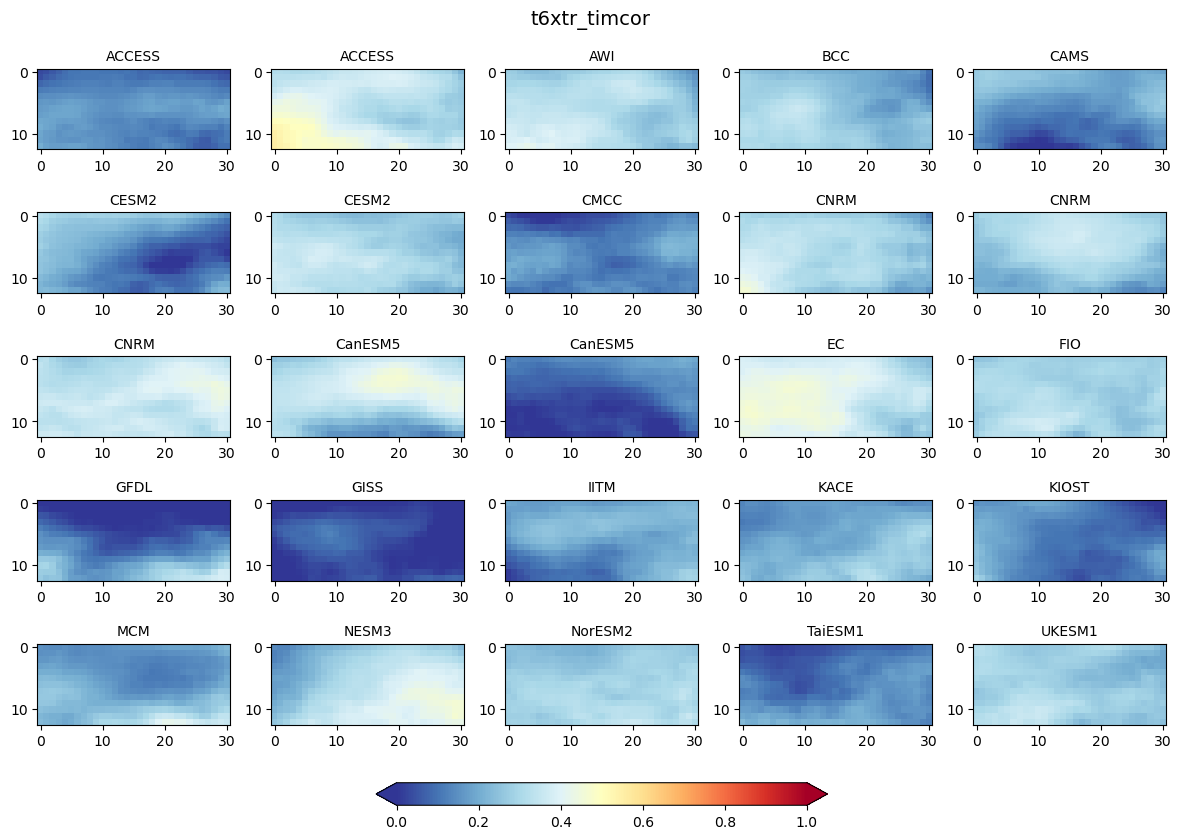

In [108]:
data_disp ('timcor', '', file_dict, 'tas', 5, 0, 0, 3, "t6xtr_timcor", 1, "")

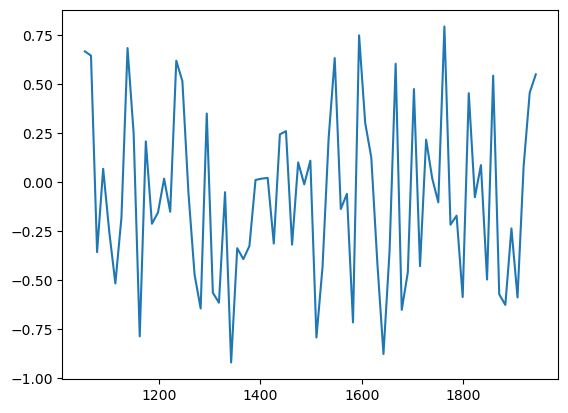

In [145]:
# Plotting one fldcor
file = 'fldcor_tas_Amon_ACCESS_CM2_ssp585_r1i1p1f1_185001_210012_r360x180.nc'
# fldcor[file]['tas'][:,:,0][:,0]
# fldcor[file]['time']

plt.plot(fldcor[file]['time'], fldcor[file]['tas'][:,:,0][:,0])

In [143]:
# Open 25 timcors from my directory
i = 0
for file in file_dict.keys():
    if ('fldcor' in file and not 'timmean' in file):
        print (file)
        i+=1
i

fldcor_tas_Amon_ACCESS_CM2_ssp585_r1i1p1f1_185001_210012_r360x180.nc
fldcor_tas_Amon_ACCESS_ESM1_5_ssp585_r1i1p1f1_185001_210012_r360x180.nc
fldcor_tas_Amon_AWI_CM_1_1_MR_ssp585_r1i1p1f1_185001_210012_r360x180.nc
fldcor_tas_Amon_BCC_CSM2_MR_ssp585_r1i1p1f1_185001_210012_r360x180.nc
fldcor_tas_Amon_CAMS_CSM1_0_ssp585_r1i1p1f1_185001_210012_r360x180.nc
fldcor_tas_Amon_CanESM5_CanOE_ssp585_r1i1p2f1_185001_210012_r360x180.nc
fldcor_tas_Amon_CanESM5_ssp585_r1i1p1f1_185001_210012_r360x180_remap.nc
fldcor_tas_Amon_CESM2_ssp585_r1i1p1f1_185001_210012_r360x180_remap.nc
fldcor_tas_Amon_CESM2_WACCM_ssp585_r1i1p1f1_185001_210012_r360x180.nc
fldcor_tas_Amon_CMCC_ESM2_ssp585_r1i1p1f1_185001_210012_r360x180.nc
fldcor_tas_Amon_CNRM_CM6_1_HR_ssp585_r1i1p1f2_185001_210012_r360x180.nc
fldcor_tas_Amon_CNRM_CM6_1_ssp585_r1i1p1f2_185001_210012_r360x180.nc
fldcor_tas_Amon_CNRM_ESM2_1_ssp585_r1i1p1f2_185001_210012_r360x180.nc
fldcor_tas_Amon_EC_Earth3_ssp585_r1i1p1f1_185001_210012_r360x180.nc
fldcor_tas_Amon_

25

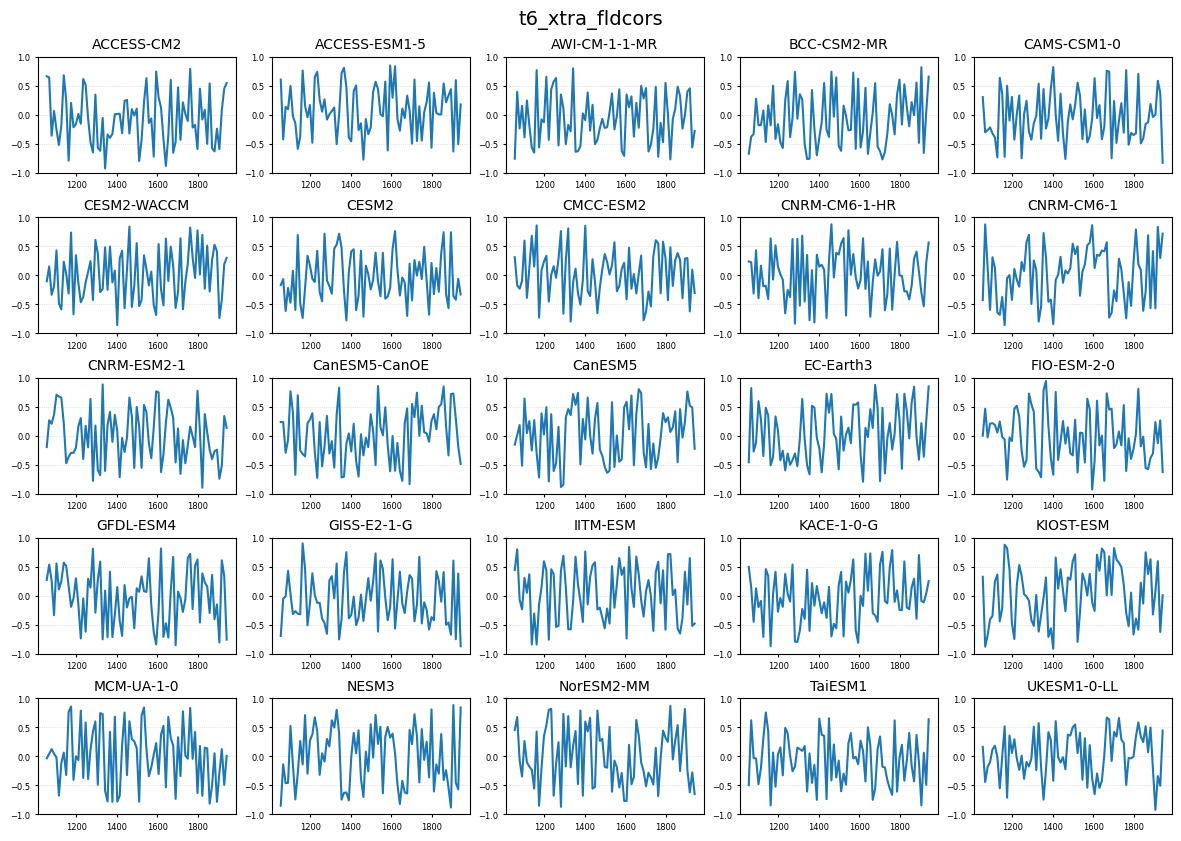

In [216]:
def data_plot (keyword, stopword, data_dict, name_y, name_x, columns, pos_in_filename, title, fig_name):

    #### Displayig 25 fldcor --- as 25 plots with y = value and x = time
    if keyword == '' and stopword == '':
        data_list = np.array([file for file in data_dict.keys()])
    elif stopword == '':
        data_list = np.array([file for file in data_dict.keys() if keyword in file])
    else:
        data_list = np.array([file for file in data_dict.keys() if (keyword in file and not stopword in file)])
    
    data_list = np.sort(data_list)
    n_subs = len(data_list)
    fig, ax = plt.subplots(n_subs//columns, columns, figsize=(11.7, 8.3), layout='constrained')
      
    fig.suptitle (title, fontsize=14)

    for i in range(n_subs):
        row = i // columns
        column = i % columns
#         line = str(data_list[i].split('_')[pos_in_filename +1:])

        name = str('-'.join(data_list[i].split('_')[pos_in_filename:next((index for index, elem in enumerate(data_list[i].split('_')) if 'ssp' in elem), None)]))
        array = data_dict[data_list[i]]
        
        plotted = ax[row, column].plot(array[name_x], array[name_y][:,0,0])
        ax[row, column].set_ylim(-1, 1)  
        ax[row, column].set_title(name, fontsize=10)
        
        ax[row, column].tick_params(length=2, labelsize=6)
#         # Calculate the tick positions
#         tick_positions = np.arange(50 * m.ceil((array[name_x].min()) / 50), len(array[name_x]), 50)
#         # Set the tick positions and labels
#         ax[row, column].set_xticks(tick_positions)
#         ax[row, column].set_xticklabels(array[name_x][::50])

        ax[row, column].grid(color='black', linestyle='dotted', linewidth=0.5, alpha=0.2, axis='y')
    plt.show()
    if (fig_name != ""):    fig.savefig(fig_name)

data_plot ('fldcor', 'timmean', file_dict, 'tas', 'time', 5, 3, "t6_xtra_fldcors", "")